EDA

In [70]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset principal de solicitudes de adelanto en efectivo
cash_request = pd.read_csv('../data/extract - cash request - data analyst.csv')

# Inspeccionar la estructura y el tipo de datos de 'cash_request'
cash_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [71]:
# Crear una copia del DataFrame para preservar el original
cr = cash_request.copy()
# Filtrar columnas relevantes para el análisis
cr = cr[["id","amount", "created_at", "user_id", "deleted_account_id","transfer_type"]]
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  23970 non-null  int64  
 1   amount              23970 non-null  float64
 2   created_at          23970 non-null  object 
 3   user_id             21867 non-null  float64
 4   deleted_account_id  2104 non-null   float64
 5   transfer_type       23970 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [72]:
# Convertir 'created_at' a tipo datetime para manipulación de fechas
cr['created_at'] = pd.to_datetime(cr['created_at'])
cr.head()

,id,amount,created_at,user_id,deleted_account_id,transfer_type
0,5,100.0,2019-12-10 19:05:21.596873+00:00,804.0,NaN,regular
1,70,100.0,2019-12-10 19:50:12.347780+00:00,231.0,NaN,regular
2,7,100.0,2019-12-10 19:13:35.825460+00:00,191.0,NaN,regular
3,10,99.0,2019-12-10 19:16:10.880172+00:00,761.0,NaN,regular
4,1594,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,regular


In [73]:
cr['Mes'] = cr['created_at'].dt.to_period('M')
cr.head()

/var/folders/jx/l1rhn9z13pn7sj46s794rbsh0000gp/T/ipykernel_45822/3201360128.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cr['Mes'] = cr['created_at'].dt.to_period('M')


,id,amount,created_at,user_id,deleted_account_id,transfer_type,Mes
0,5,100.0,2019-12-10 19:05:21.596873+00:00,804.0,NaN,regular,2019-12
1,70,100.0,2019-12-10 19:50:12.347780+00:00,231.0,NaN,regular,2019-12
2,7,100.0,2019-12-10 19:13:35.825460+00:00,191.0,NaN,regular,2019-12
3,10,99.0,2019-12-10 19:16:10.880172+00:00,761.0,NaN,regular,2019-12
4,1594,100.0,2020-05-06 09:59:38.877376+00:00,7686.0,NaN,regular,2020-05


In [74]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
cr['created_at'] = cr['created_at'].dt.tz_localize(None)
cr.head()

,id,amount,created_at,user_id,deleted_account_id,transfer_type,Mes
0,5,100.0,2019-12-10 19:05:21.596873,804.0,NaN,regular,2019-12
1,70,100.0,2019-12-10 19:50:12.347780,231.0,NaN,regular,2019-12
2,7,100.0,2019-12-10 19:13:35.825460,191.0,NaN,regular,2019-12
3,10,99.0,2019-12-10 19:16:10.880172,761.0,NaN,regular,2019-12
4,1594,100.0,2020-05-06 09:59:38.877376,7686.0,NaN,regular,2020-05


In [75]:
# Add the 'active' column: 1 if deleted_account_id is NaN, otherwise 0
cr['active'] = cr['deleted_account_id'].apply(lambda x: 1 if pd.isna(x) else 0)

# Migrate user_id:
# - For rows where deleted_account_id exists, use "99" + deleted_account_id
# - Otherwise, keep the original user_id
cr['user_id'] = cr.apply(
    lambda row: int(f"99{int(row['deleted_account_id'])}") if not pd.isna(row['deleted_account_id']) else row['user_id'],
    axis=1
)

# Drop the 'deleted_account_id' column
cr_new = cr.drop(columns=['deleted_account_id'])

# Display the transformed DataFrame
print(cr_new)


          id  amount                 created_at    user_id transfer_type  \
0          5   100.0 2019-12-10 19:05:21.596873      804.0       regular   
1         70   100.0 2019-12-10 19:50:12.347780      231.0       regular   
2          7   100.0 2019-12-10 19:13:35.825460      191.0       regular   
3         10    99.0 2019-12-10 19:16:10.880172      761.0       regular   
4       1594   100.0 2020-05-06 09:59:38.877376     7686.0       regular   
...      ...     ...                        ...        ...           ...   
23965  20616   100.0 2020-10-12 13:54:11.686225    13681.0       instant   
23966  25243    50.0 2020-10-27 14:41:25.734910  9930367.0       instant   
23967  22357   100.0 2020-10-20 07:58:04.006937    82122.0       instant   
23968  20256   100.0 2020-10-10 05:40:55.700422    64517.0       instant   
23969  19886   100.0 2020-10-08 14:16:52.155661    44867.0       instant   

           Mes  active  
0      2019-12       1  
1      2019-12       1  
2      2019-

In [76]:
cr_new['created_at'] = pd.to_datetime(cr_new['created_at'])
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
cr_new['Cohorte'] = cr_new.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
cr_new.head(10)

,id,amount,created_at,user_id,transfer_type,Mes,active,Cohorte
0,5,100.0,2019-12-10 19:05:21.596873,804.0,regular,2019-12,1,2019-12
1,70,100.0,2019-12-10 19:50:12.347780,231.0,regular,2019-12,1,2019-12
2,7,100.0,2019-12-10 19:13:35.825460,191.0,regular,2019-12,1,2019-12
3,10,99.0,2019-12-10 19:16:10.880172,761.0,regular,2019-12,1,2019-12
4,1594,100.0,2020-05-06 09:59:38.877376,7686.0,regular,2020-05,1,2020-05
5,2145,100.0,2020-05-23 20:58:55.129432,9489.0,regular,2020-05,1,2020-05
6,3512,100.0,2020-06-16 17:07:38.452652,14631.0,regular,2020-06,1,2020-06
7,654,100.0,2020-02-10 01:11:53.808270,99309.0,regular,2020-02,0,2020-01
8,5672,100.0,2020-06-28 12:06:33.712840,992499.0,regular,2020-06,0,2020-06
9,71,90.0,2019-12-10 19:51:23.911206,897.0,regular,2019-12,1,2019-12


In [77]:
# Calcular el número inicial de clientes únicos en cada cohorte
cohort_sizes_initial = cr_new.groupby('Cohorte').agg(Num_Clientes_Iniciales=('user_id', 'nunique')).reset_index()
cohort_sizes_initial

,Cohorte,Num_Clientes_Iniciales
0,2019-11,1
1,2019-12,256
2,2020-01,108
3,2020-02,93
4,2020-03,91
5,2020-04,250
6,2020-05,438
7,2020-06,1565
8,2020-07,1507
9,2020-08,737


In [78]:
# Calcular la cantidad de clientes únicos en cada cohorte para cada mes
cohort_sizes_monthly = cr_new.groupby(['Cohorte', 'Mes']).agg(Num_Clientes=('user_id', 'nunique')).reset_index()
cohort_sizes_monthly

,Cohorte,Mes,Num_Clientes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,679
79,2020-09,2020-11,20
80,2020-10,2020-10,4821
81,2020-10,2020-11,15


In [79]:
# Calcular la cantidad de solicitudes de adelanto de efectivo de los clientes de cada cohorte en cada mes
cohort_cash_monthly = cr_new.groupby(['Cohorte', 'Mes']).agg(Num_Solicitudes=('user_id', 'count')).reset_index()
cohort_cash_monthly

,Cohorte,Mes,Num_Solicitudes
0,2019-11,2019-11,1
1,2019-11,2019-12,1
2,2019-11,2020-04,1
3,2019-11,2020-05,1
4,2019-11,2020-08,1
...,...,...,...
78,2020-09,2020-10,727
79,2020-09,2020-11,20
80,2020-10,2020-10,5061
81,2020-10,2020-11,15


In [80]:
# Calcular la tasa de retención de clientes (clientes únicos por cohorte en cada mes / clientes iniciales de la cohorte)
retention_clientes = cohort_sizes_monthly.pivot(index='Cohorte', columns='Mes', values='Num_Clientes')
retention_clientes = retention_clientes.div(cohort_sizes_initial.set_index('Cohorte')['Num_Clientes_Iniciales'], axis=0)
retention_clientes

Mes,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
Cohorte,,,,,,,,,,,,,
2019-11,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
2019-12,NaN,1.0,0.347656,0.214844,0.253906,0.242188,0.281250,0.250000,0.218750,0.253906,0.164062,0.250000,0.003906
2020-01,NaN,NaN,1.000000,0.212963,0.148148,0.259259,0.240741,0.231481,0.250000,0.194444,0.185185,0.212963,0.009259
2020-02,NaN,NaN,NaN,1.000000,0.473118,0.451613,0.451613,0.419355,0.397849,0.397849,0.268817,0.387097,NaN
2020-03,NaN,NaN,NaN,NaN,1.000000,0.428571,0.395604,0.494505,0.373626,0.351648,0.318681,0.307692,0.010989
2020-04,NaN,NaN,NaN,NaN,NaN,1.000000,0.468000,0.488000,0.368000,0.316000,0.268000,0.244000,NaN
2020-05,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.577626,0.497717,0.415525,0.312785,0.347032,0.009132
2020-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.486262,0.477316,0.366134,0.359105,0.003195
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.468480,0.339748,0.351029,0.004645


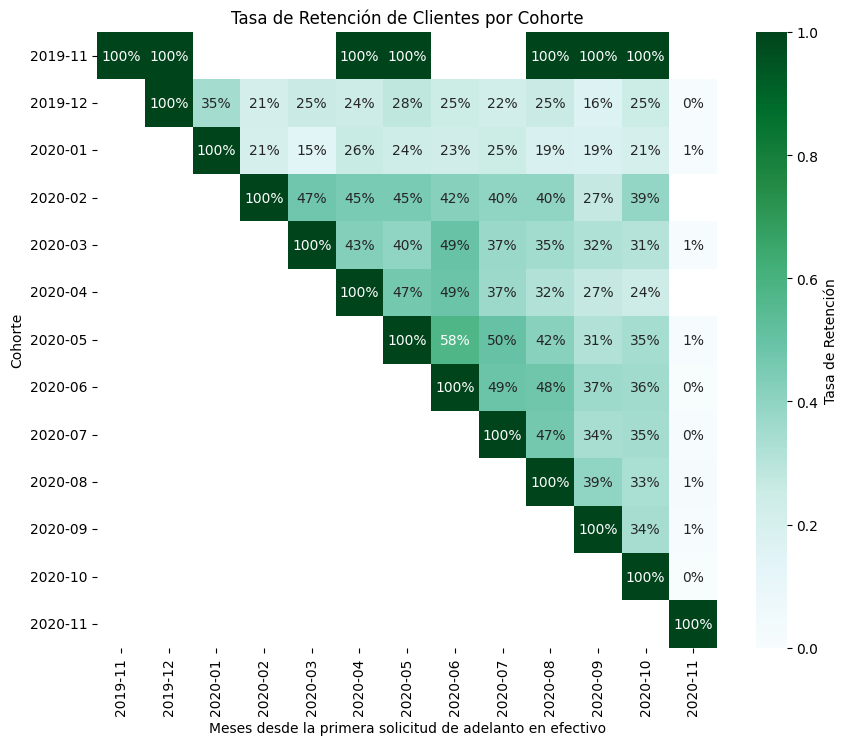

In [81]:
# Visualizar la tasa de retención de clientes usando un mapa de calor
plt.figure(figsize=(10, 8))
plt.title('Tasa de Retención de Clientes por Cohorte')
sns.heatmap(data=retention_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0, cmap='BuGn', cbar_kws={'label': 'Tasa de Retención'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [82]:
# Calcular la tasa de abandono de clientes (1 - tasa de retención)
churn_clientes = 1 - retention_clientes


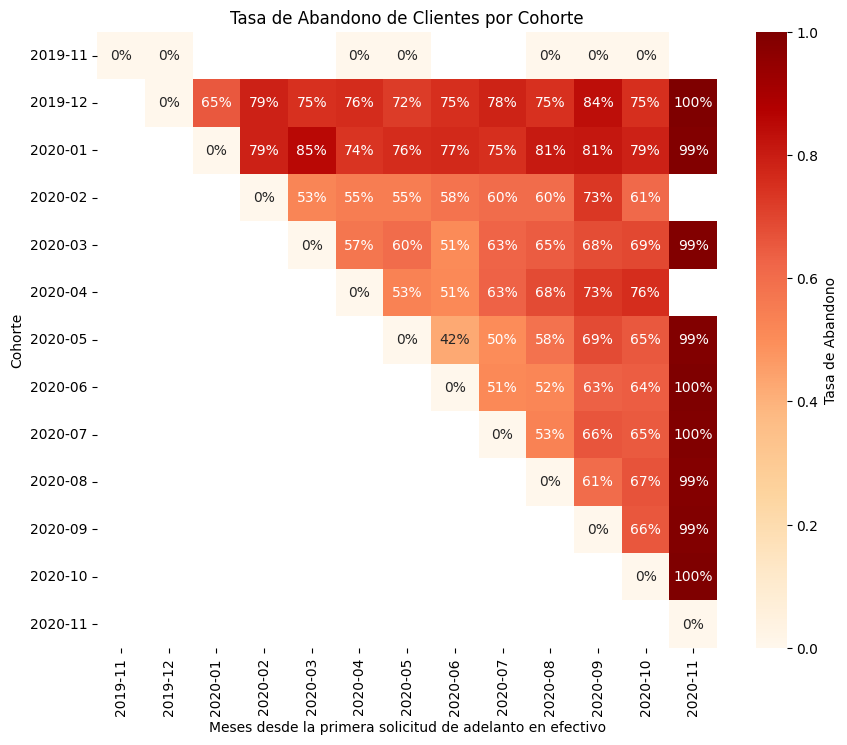

In [83]:

plt.figure(figsize=(10, 8))
plt.title('Tasa de Abandono de Clientes por Cohorte')
sns.heatmap(data=churn_clientes, annot=True, fmt='.0%', vmin=0.0, vmax=1.0,cmap='OrRd', cbar_kws={'label': 'Tasa de Abandono'})
plt.xlabel('Meses desde la primera solicitud de adelanto en efectivo')
plt.ylabel('Cohorte')
plt.show()

In [84]:
# Cargar el dataset de tarifas o fees para análisis de cohortes de tarifas
fees = pd.read_csv('../data/extract - fees - data analyst - .csv')
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [98]:
# Crear una copia del DataFrame para preservar el original
fs = fees.copy()
fs = fs[["cash_request_id","type","status", "total_amount", "created_at"]]
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cash_request_id  21057 non-null  float64
 1   type             21061 non-null  object 
 2   status           21061 non-null  object 
 3   total_amount     21061 non-null  float64
 4   created_at       21061 non-null  object 
dtypes: float64(2), object(3)
memory usage: 822.8+ KB


In [99]:
# Convertir la columna 'created_at' en fees a tipo datetime para análisis temporal
fs['created_at'] = pd.to_datetime(fs['created_at'])
fs.head()

,cash_request_id,type,status,total_amount,created_at
0,14941.0,instant_payment,rejected,5.0,2020-09-07 10:47:27.423150+00:00
1,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653+00:00
2,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972+00:00
3,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958+00:00
4,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432+00:00


In [100]:
# Convertir la columna 'created_at' a una fecha sin zona horaria
fs['created_at'] = fs['created_at'].dt.tz_localize(None)
fs.head()

,cash_request_id,type,status,total_amount,created_at
0,14941.0,instant_payment,rejected,5.0,2020-09-07 10:47:27.423150
1,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653
2,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972
3,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958
4,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432


In [110]:
# Crear columna 'Mes' indicando el mes de cada solicitud
fs['Mes'] = fs['created_at'].dt.to_period('M')
fs.head()

,cash_request_id,type,status,total_amount,created_at,Mes
0,14941.0,instant_payment,rejected,5.0,2020-09-07 10:47:27.423150,2020-09
1,11714.0,incident,accepted,5.0,2020-09-09 20:51:17.998653,2020-09
2,23371.0,instant_payment,accepted,5.0,2020-10-23 10:10:58.352972,2020-10
3,26772.0,instant_payment,accepted,5.0,2020-10-31 15:46:53.643958,2020-10
4,19350.0,instant_payment,accepted,5.0,2020-10-06 08:20:17.170432,2020-10


     month  total_fees  total_adelantos  fees_ratio
0  2020-05       520.0           9980.0    5.210421
1  2020-06      4685.0          87281.0    5.367720
2  2020-07      5165.0          92595.0    5.578055
3  2020-08     11700.0         206271.0    5.672150
4  2020-09     16785.0         283288.0    5.925066
5  2020-10     34840.0         513556.0    6.784070
6  2020-11       515.0           7935.0    6.490233


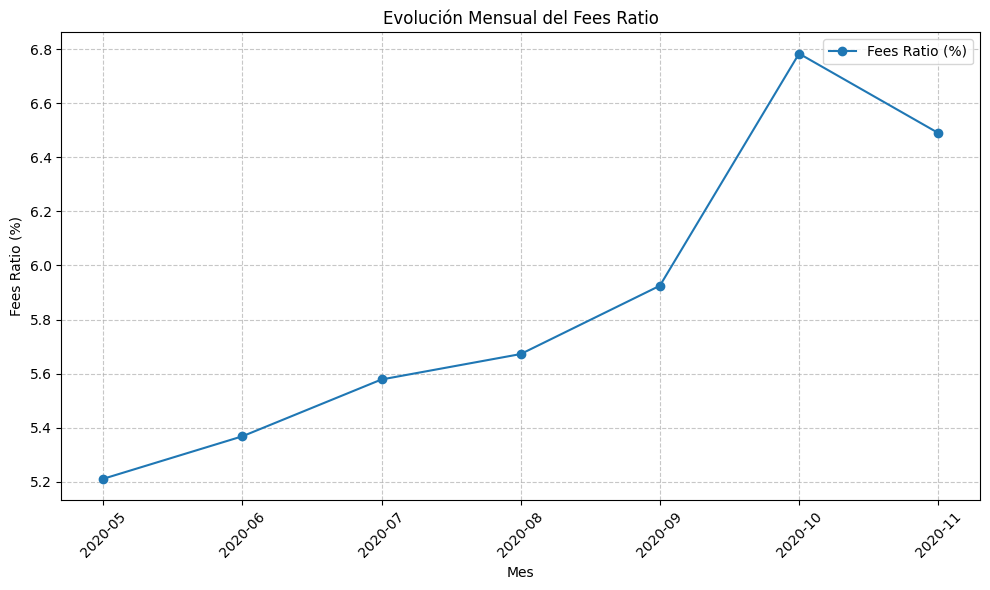

In [111]:
# Filtrar las filas de fees con status "accepted"
fs_accepted = fs[fs['status'] == 'accepted']

# Vincular las tablas a través de id y cash_request_id
merged = pd.merge(fs_accepted, cr_new, left_on='cash_request_id', right_on='id', how='inner')

# Crear una columna de mes basada en la fecha de cash_request
merged['month'] = merged['created_at_y'].dt.to_period('M')  # created_at_y viene de cr_new (cash_request)

# Calcular las métricas mensuales
monthly_data = merged.groupby('month').agg(
    total_fees=('total_amount', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] * 100

# Mostrar la evolución mensual
print(monthly_data)

# Plotear la evolución del fees_ratio
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['month'].astype(str), monthly_data['fees_ratio'], marker='o', label='Fees Ratio (%)')
plt.title('Evolución Mensual del Fees Ratio')
plt.xlabel('Mes')
plt.ylabel('Fees Ratio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:


# Vincular las tablas a través de id y cash_request_id
merged = pd.merge(fs, cr_new, left_on='cash_request_id', right_on='id', how='inner')

# Crear una columna de mes para agrupar
merged['month'] = merged['created_at_y'].dt.to_period('M')  # O usa 'created_at_y' si prefieres la de cash_request

# Calcular las métricas mensuales
monthly_data = merged.groupby('month').agg(
    total_fees=('total_amount', 'sum'),
    total_adelantos=('amount', 'sum')
).reset_index()

# Calcular el ratio de fees sobre adelantos
monthly_data['fees_ratio'] = monthly_data['total_fees'] / monthly_data['total_adelantos'] *100

# Mostrar la evolución mensual
print(monthly_data)

      month             type  total_fees  total_adelantos  fees_ratio
0   2020-05         incident       175.0           3390.0    5.162242
1   2020-05         postpone       345.0           6590.0    5.235205
2   2020-06         incident      1995.0          36445.0    5.474002
3   2020-06         postpone      2690.0          50836.0    5.291526
4   2020-07         incident      2110.0          37045.0    5.695775
5   2020-07  instant_payment       595.0           9940.0    5.985915
6   2020-07         postpone      2460.0          45610.0    5.393554
7   2020-08         incident      1805.0          30046.0    6.007455
8   2020-08  instant_payment      7085.0         125425.0    5.648794
9   2020-08         postpone      2810.0          50800.0    5.531496
10  2020-09         incident      1520.0          23975.0    6.339937
11  2020-09  instant_payment     11825.0         199263.0    5.934368
12  2020-09         postpone      3440.0          60050.0    5.728560
13  2020-10         

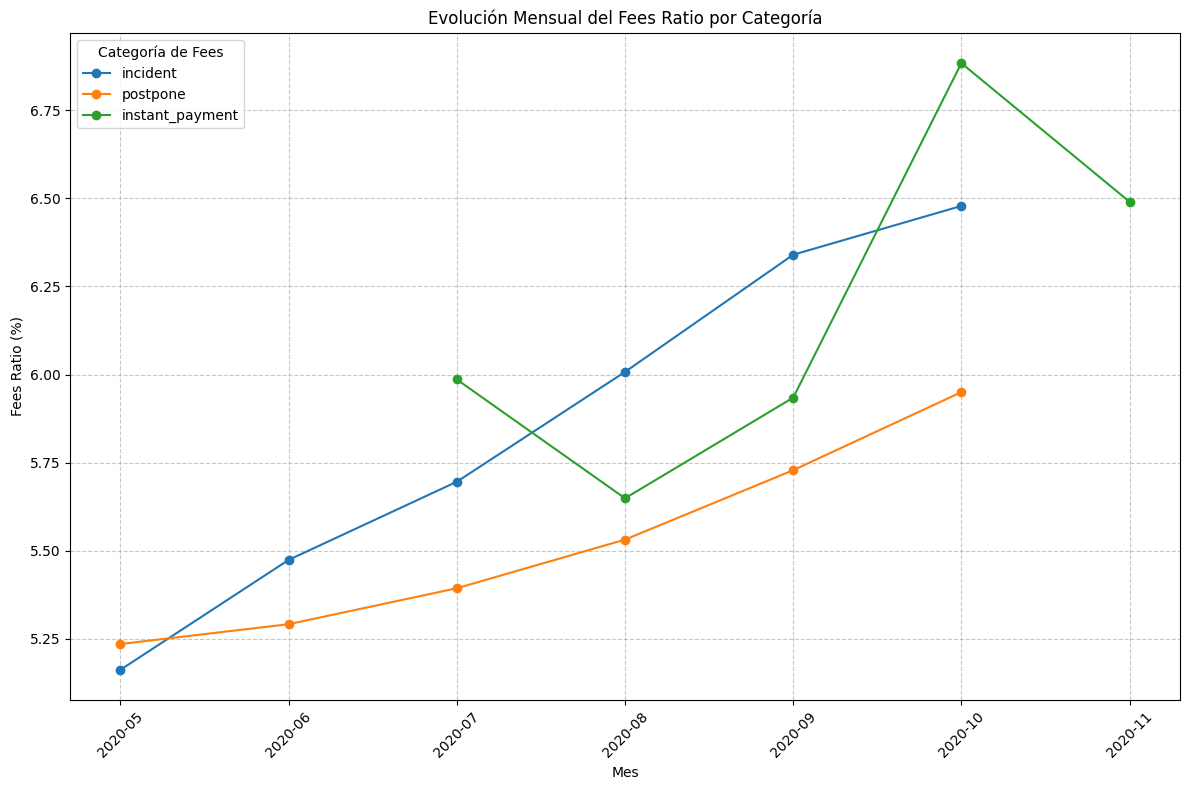

In [106]:
# Plotear la evolución del fees_ratio desglosada por categoría
plt.figure(figsize=(12, 8))
for fee_type in monthly_data['type'].unique():
    subset = monthly_data[monthly_data['type'] == fee_type]
    plt.plot(subset['month'].astype(str), subset['fees_ratio'], marker='o', label=fee_type)

plt.title('Evolución Mensual del Fees Ratio por Categoría')
plt.xlabel('Mes')
plt.ylabel('Fees Ratio (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Categoría de Fees')
plt.tight_layout()
plt.show()